In [19]:
from math import log
from collections import defaultdict
import numpy as np

In [20]:
normal_counts = {'dear': 8, 'friend': 5, 'lunch': 3,'money': 1}
spam_counts   = {'dear': 2, 'friend': 1, 'lunch': 0,'money': 4}

total_spam_words = sum(spam_counts.values())  # 17
total_normal_words = sum(normal_counts.values())  # 2 + 1 + 4 = 7

p_spam = .33
p_normal = 0.67

vocab = set(spam_counts.keys()).union(normal_counts.keys())
vocab_size = len(vocab)  

test_message = ['dear', 'friend']

def compute_prob(message, class_counts, total_words, prior):
    prob = prior
    for word in message:
        word_freq = class_counts.get(word, 0)
        word_prob = (word_freq + 1) / (total_words + vocab_size)  # Laplace smoothing
        prob *= word_prob
    return prob


prob_spam = compute_prob(test_message, spam_counts, total_spam_words, p_spam)
prob_normal = compute_prob(test_message, normal_counts, total_normal_words, p_normal)

total = prob_spam + prob_normal
prob_spam_normalized = prob_spam / total
prob_normal_normalized = prob_normal / total


print(f"Normalized probability (spam): {prob_spam_normalized:.4f}")
print(f"Normalized probability (normal): {prob_normal_normalized:.4f}")

prediction = "spam" if prob_spam > prob_normal else "normal"
print(f"\nPredicted class: {prediction}")


Normalized probability (spam): 0.1663
Normalized probability (normal): 0.8337

Predicted class: normal


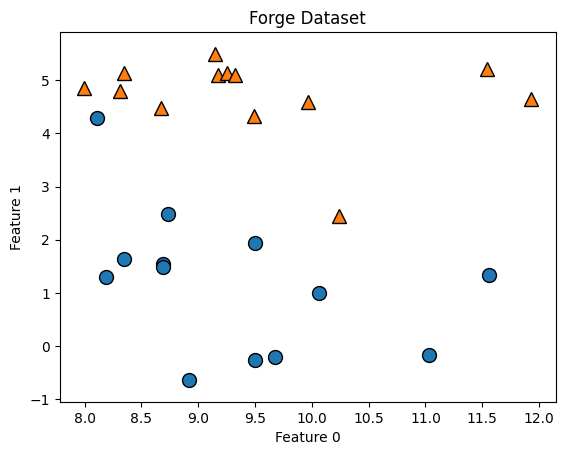

In [21]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load forge dataset
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Forge Dataset")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Predictions: [1 0 1 0 1 0 0]
Accuracy: 0.8571428571428571


Predictions: [1 0 1 0 1 0 0]
Accuracy: 0.8571428571428571


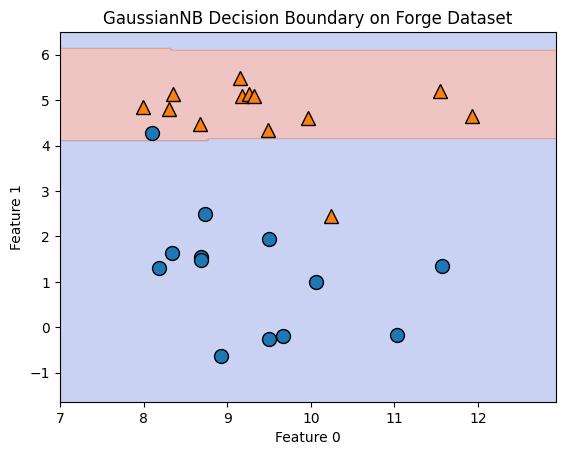

In [23]:
y_pred = gnb.predict(X_test)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("GaussianNB Decision Boundary on Forge Dataset")
plt.show()